In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
df_month10 = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/202210Tokyostation.csv',engine='python')
df_month7 = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/202271month_per_hour_in_disaster.csv',engine='python')

In [3]:
df_month10["created_at"]=df_month10["created_at"].astype(str)
created_time=df_month10.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_month10=pd.concat([df_month10,creatid_at_day_list],axis=1)
df_month10=df_month10.rename(columns={0: 'creatid_at_day'})
df_month10=pd.concat([df_month10,creatid_at_hour_list],axis=1)
df_month10=df_month10.rename(columns={0: 'creatid_at_hour'})

In [4]:
df_month7["created_at"]=df_month7["created_at"].astype(str)
created_time=df_month7.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_month7=pd.concat([df_month7,creatid_at_day_list],axis=1)
df_month7=df_month7.rename(columns={0: 'creatid_at_day'})
df_month7=pd.concat([df_month7,creatid_at_hour_list],axis=1)
df_month7=df_month7.rename(columns={0: 'creatid_at_hour'})

In [5]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [6]:
df_month10 = df_month10[df_month10['creatid_at_day'].isin(day_list)]
df_month10 = df_month10[df_month10['creatid_at_hour'].isin(hour_list)]

In [7]:
df_month7 = df_month7[df_month7['creatid_at_day'].isin(day_list)]
df_month7 = df_month7[df_month7['creatid_at_hour'].isin(hour_list)]

In [8]:
df_month10['created_at'] = pd.to_datetime(df_month10['created_at'],format="%Y-%m-%d_%H:%M:%S")
df_month7['created_at'] = pd.to_datetime(df_month7['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [9]:
df_month10 = df_month10.dropna(subset=['created_at'])
df_month7 = df_month7.dropna(subset=['created_at'])

In [10]:
list_tweet_range_month10 = []
for day in day_list:
    day = int(day)
    df_perday = df_month10[(df_month10['created_at'].dt.day==day)]
    list_tweet_range_month10_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_month10_per_day.append(delta)
    list_tweet_range_month10.append(list_tweet_range_month10_per_day)
list_tweets_count_month10 = []
for day in day_list:
    day = int(day)
    df_perday = df_month10[(df_month10['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_month10_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_month10_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_month10_per_hour.append(0)
    list_tweets_count_month10.append(list_tweets_count_month10_per_hour)
list_tweet_range_month10 = np.array(list_tweet_range_month10)
list_tweets_count_month10 = np.array(list_tweets_count_month10)
estimate_month10 = list_tweets_count_month10*(3600/list_tweet_range_month10)

In [11]:
list_tweet_range_month7 = []
for day in day_list:
    day = int(day)
    df_perday = df_month7[(df_month7['created_at'].dt.day==day)]
    list_tweet_range_month7_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_month7_per_day.append(delta)
    list_tweet_range_month7.append(list_tweet_range_month7_per_day)
list_tweets_count_month7 = []
for day in day_list:
    day = int(day)
    df_perday = df_month7[(df_month7['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_month7_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_month7_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_month7_per_hour.append(0)
    list_tweets_count_month7.append(list_tweets_count_month7_per_hour)
list_tweet_range_month7 = np.array(list_tweet_range_month7)
list_tweets_count_month7 = np.array(list_tweets_count_month7)
estimate_month7 = list_tweets_count_month7*(3600/list_tweet_range_month7)

Text(69.0, 0.5, 'day')

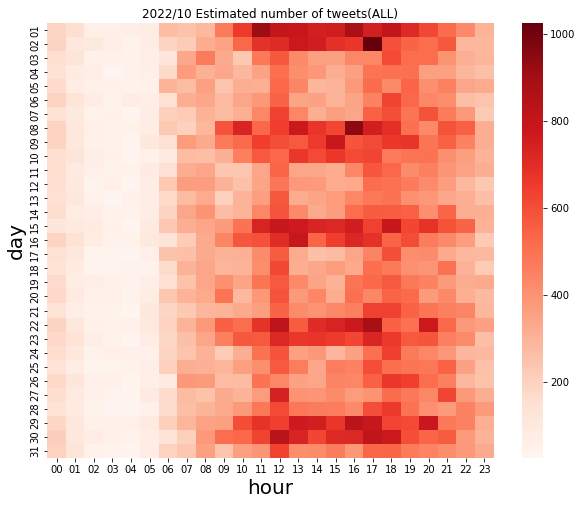

In [12]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_month10,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/10 Estimated number of tweets(ALL)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)

Text(69.0, 0.5, 'day')

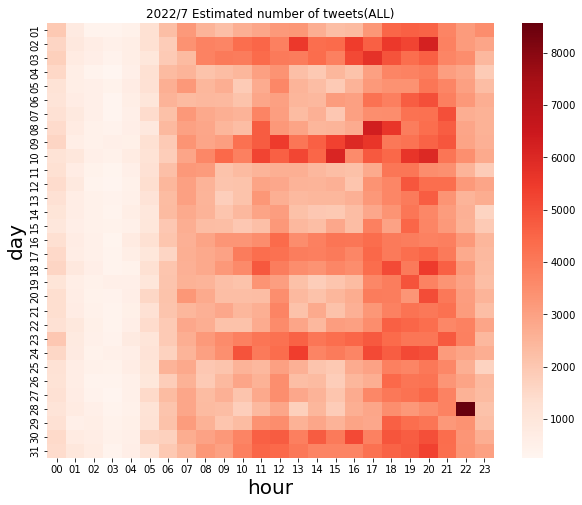

In [13]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_month7,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of tweets(ALL)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)

In [14]:
day=12
day = int(day)
df_perday = df_month7[(df_month7['created_at'].dt.day==day)]
df_perday[(df_perday['created_at'].dt.hour==22)]

Unnamed: 0                                               text  \
28604          0                              @uxtudosmx 美味しいですよ😋🎶。   
28605          1                     @The_Scalpel_ いやあのそのありがとうございます   
28606          2                King Gnu。いつか、あずささん、響とコラボしないかなー。違うか！   
28607          3                    これは、ひどい https://t.co/uAYhbY1vL7   
28608          4                                         ん？また梅雨来たん？   
...          ...                                                ...   
28699         95  ヴィヴィくんとマリノス君〜〜〜😭😭😭😭なぜかマリノスケのぬいも持ってくれてる😭😭😭ヴィヴィく...   
28700         96                     @miya_042128 頑張って、一ヶ月後撮影行きましょう   
28701         97   #ユニコーンに乗って の感想共有会やってますー！ https://t.co/LSIbfcCJvH   
28702         98      中国の一部族かと思うくらい発想が似ている。 https://t.co/sUGv68MPCs   
28703         99                                              雨強すぎ…   

               created_at  retweets  replies  likes quote_count  \
28604 2022-07-12 22:59:58       0.0      1.0    1.0           0   
28605 2022-07-12 22:59:55       0.0      0.0    1.0           0   
28606 2022-07-12 22:59:54       0.0      0.0    0.0           0   
28607 2022-07-12 22:59:51       0.0      0.0    0.0           0   
28608 2022-07-12 22:59:51       0.0      0.0    3.0           0   
...                   ...       ...      ...    ...         ...   
28699 2022-07-12 22:58:10       0.0      0.0   11.0           0   
28700 2022-07-12 22:58:09       0.0      1.0    1.0           0   
28701 2022-07-12 22:58:08       0.0      0.0    2.0           0   
28702 2022-07-12 22:58:07       0.0      0.0    0.0           0   
28703 2022-07-12 22:58:05       0.0      0.0   10.0           0   

               place_id            author_id      username  author_followers  \
28604  de733ecbe94a943c            384361644       M__Soka             299.0   
28605  1b0cfebe3424e14f  1275465709754044416  DUKE790black             850.0   
28606  de41e0d24ed75302             59751442           UD2            1402.0   
28607  faab662cb34cf04f            134739974   megminHighG              13.0   
28608  7efb0fd5276fdda5           1111589016    god_of_888            1217.0   
...                 ...                  ...           ...               ...   
28699  bb7a59998ec7fdba            121681814  merumo22supi            1120.0   
28700  65b41c11aca77bdb            201230874    hiro930728            1714.0   
28701  0fd33386c57b038a             54607390     hassy0607            3630.0   
28702  594fa6c6bc5b5ba9             52586127   Shinoyama_K           20528.0   
28703  cd477ff3b533582b   999801309208309760   daichi_mc41            2057.0   

       author_tweets                                 author_description  \
28604        15930.0  2011年4月からシンガーソングライターあえかさんを応援しています。路上ライブがきっかけでイ...   
28605         3183.0                        ビール飲みたい 昼飲みの人 日焼けマスター 足つきJK   
28606        29280.0      「遊び」をクリエイトする。アソビきれない毎日を。楽しく、熱心に。死ぬまでイキイキと生きる。   
28607          390.0  夫とお空の猫おうちの猫2匹の5人家族です。美味しいものをお気に入りの器で食することに日々力を...   
28608        45852.0  Twitterは主にセンスあるバカをRTでシェアする目的で運用しています。住所不定無職（元ホ...   
...              ...                                                ...   
28699        43085.0  物心ついた時からマリサポ！2018年～念願の横浜市民に！仕事も新横浜に転職！年チケ指定席民。...   
28700        57324.0  下総守 大文（しもうさのかみ ひろふみ）と申します。 カメラマン兼レイヤーやってます。 いつ...   
28701        11964.0  株式会社ペライチ 取締役Co-Founder バックグラウンドはエンジニア ホームページを誰...   
28702        17645.0  「かばんの会」会員。トイカメラも好きなパタゴマニア□ 特技札勘、縦勘も横勘も I like ...   
28703        26033.0  バイク屋さんで働いてるメカニックのアカウントです。趣味でご飯つくってみたり…バイク弄ったり…...   

      author_location creatid_at_day creatid_at_hour  
28604             NaN             12              22  
28605             京都府             12              22  
28606             横浜市             12              22  
28607          東京 杉並区             12              22  
28608          惑星ベジータ             12              22  
...               ...            ...             ...  
28699             NaN             12              22  
28700             下総国             12          

In [15]:
df_perday

Unnamed: 0                                               text  \
26409          0  今日はグダグダでしたが昨日はお子ちゃまとパートナーとの3人でお出かけしてました。 まあ観光地...   
26410          1           @shoot_765RS こんばんは無いです関東ではカレーにソースも掛けません😁   
26411          2  @onigiriface_jp @tarayu37 @yasuotofurokuni @ok...   
26412          3                                      最近動画作る気になんねぇw   
26413          4  @mahi07_official @hatooriPhoto おめでとうございます❣️😊🙌🎉...   
...          ...                                                ...   
28798         94                                               さて寝る   
28799         95                                          雨が強く降ってます   
28800         96  @sara_sara3198 応募させて頂きます。当選頂きましたらアカウントで紹介させてくだ...   
28801         97               みんな一体感ぱねぇです🥰 https://t.co/6YfZjOMbfM   
28802         98  森友問題の新たな物証発見　安倍昭恵氏のために2つの「名誉校長室」が作られていた(文春オンライ...   

               created_at  retweets  replies  likes quote_count  \
26409 2022-07-12 00:59:58       0.0      0.0    7.0           0   
26410 2022-07-12 00:59:58       0.0      0.0    0.0           0   
26411 2022-07-12 00:59:56       0.0      0.0    2.0           0   
26412 2022-07-12 00:59:54       0.0      0.0    2.0           0   
26413 2022-07-12 00:59:54       0.0      1.0    4.0           0   
...                   ...       ...      ...    ...         ...   
28798 2022-07-12 23:58:04       0.0      0.0    2.0           0   
28799 2022-07-12 23:58:03       0.0      0.0    2.0           0   
28800 2022-07-12 23:57:57       0.0      0.0    0.0           0   
28801 2022-07-12 23:57:56       2.0      0.0   13.0           1   
28802 2022-07-12 23:57:54       1.0      0.0    1.0           0   

               place_id            author_id         username  \
26409  5c43b25fece122d2   946672434098274304      golgorabiit   
26410  dcc2630623880f96  1235589264806559745  2dXf3L9DGZtvG0R   
26411  7efb0fd5276fdda5            192737333       junticomic   
26412  4c1c4868f96634ed  1231640568561721344       oooomoti23   
26413  03060ba847e52dcd  1407896996246032390     doukutsuoden   
...                 ...                  ...              ...   
28798  1df8c91136c4c140  1450109330892591107   _ChickenGarlic   
28799  0d8054846be7f7be            303209027    yoshihikoseki   
28800  95484b83e4708f58           2907732008     sakura823101   
28801  28b9063fdce43645  1485585183743279107    twinkle_akiba   
28802  49524fd7b35fd754            192767528          sukizoh   

       author_followers  author_tweets  \
26409             616.0        10047.0   
26410             162.0         7897.0   
26411             948.0        16422.0   
26412             108.0         1333.0   
26413            7184.0         5083.0   
...                 ...            ...   
28798             173.0        14247.0   
28799            2017.0        82957.0   
28800             493.0        69620.0   
28801            2465.0        14089.0   
28802             228.0        50439.0   

                                      author_description  \
26409  2019年度通訳案内士ストレート合格。官報合格者名簿1番目GET◇全国通訳案内士 ◇講演講師...   
26410  食う・寝る・RIDE　終活ライダー　　三浦半島走る御浦(みうら)ライダー　9月～10月はカボ...   
26411  サウナ・銭湯巡りがメインでつぶやいてます。プロ熱波“受け”師😀（←自称）#レジェン道   #...   
26412  3-5 7 純粋な中学生だから汚さないでください🙇‍♂️🙇‍♂️🙇‍♂️🙇‍♂️🙇‍♂️🙇‍...   
26413  恵比寿駅1分路地裏の隠れ家おでんBAR🍹Twitterでは「自慢のおでんとお酒」について呟き...   
...                                                  ...   
28798  RNは大好きだった学食メニュー。埼玉生まれ都内在住。在宅勤務中。J-WAVEばかり聴いてます...   
28799  元気です。青野りえ WAY WAVE 広瀬愛菜 天野なつ ミア・ナシメント 新山ひな 桐生ち...   
28800  コスメ大好きで、美容ブログ書いてます。洋服、花柄大好きです♥️新商品、ゲーム、ショッピング🍒...   
28801  眠る街秋葉原を目覚めさせる魅惑的空間の「Twinkle」公式サイト: https://t.c...   
28802  A Chapman Stick player / Bass player. チャップマンステ...   

               author_location creatid_at_day creatid_at_hour  
26409                    翔んで埼玉             12              00  
26410                      NaN             12              00  
26411                   東京 豊島区             12              00  
26412                  木ノ葉隠れの里             12              00  
26413        東京 渋谷区 恵

In [16]:
list_tweet_range[27]

NameError: name 'list_tweet_range' is not defined

In [ ]:
estimate[27]

array([1111.11111111,  758.70967742,  580.84033613,  357.14285714,
        477.4535809 , 1191.89189189, 2080.92485549, 2868.29268293,
       2352.94117647, 2292.99363057, 1800.        , 2400.        ,
       2857.14285714, 1773.39901478, 2465.75342466, 1875.78947368,
       2659.70149254, 2885.95041322, 3495.14563107, 3240.        ,
       3528.71287129, 3789.47368421, 8571.42857143, 2142.85714286])